# 2 Precision-Recall Curves

## 2.1 Euclidean Distance

In [2]:
import sklearn
from sklearn.datasets import load_digits 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import random

In [3]:
# load digits data set
digits = load_digits()

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

In [4]:
def euclidean_distance(A, B):
    #returns matrix D_ij where i is the ith instance of matrix A and j is the jth instance of matrix B
    #so D_ij is the euclidean distance between those two instances
    return np.sqrt(np.sum(np.square(A[:,None]-B),axis=2))

def sorted_euclidean_dist(A, B):
    return np.argsort(euclidean_distance(A, B), axis = 1)

In [71]:
# 1797x1797 matrix that contains TP_i(m) in TP[i][m]
TP = np.dot(np.equal((target + np.zeros(len(target)**2).reshape(len(target),len(target))).T,target[sorted_euclidean_dist(data,data)]),np.triu([1]*len(target)))
TP.shape

(1797, 1797)

In [6]:
# 1797x1797 matrix that contains FP_i(m) in FP[i][m]
FP = np.dot(np.not_equal((target + np.zeros(len(target)**2).reshape(len(target),len(target))).T,target[sorted_euclidean_dist(data,data)]),np.triu([1]*len(target)))
FP.shape

(1797, 1797)

In [7]:
# 1797x1797 matrix with N_i in each element of row i
#define N_matrix via last column of TP
N_matrix = (TP[:,len(TP)-1] + np.zeros(len(target)**2).reshape(len(target),len(target))).T

In [8]:
precision = TP/(TP + FP)
recall = TP/N_matrix

In [9]:
def mean_precision_recall(k):
    precision_k = precision[np.where(target == k)]
    recall_k = recall[np.where(target == k)]
    return np.mean(precision_k,axis = 0), np.mean(recall_k,axis = 0)

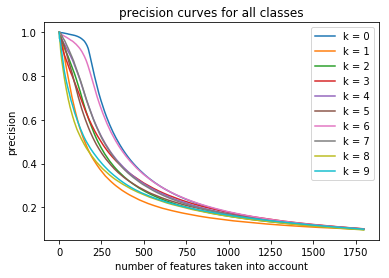

AOC of k = 0: 577.25
AOC of k = 1: 401.16
AOC of k = 2: 470.94
AOC of k = 3: 496.15
AOC of k = 4: 505.11
AOC of k = 5: 471.01
AOC of k = 6: 565.31
AOC of k = 7: 501.67
AOC of k = 8: 417.37
AOC of k = 9: 433.84


In [26]:
#precision plots
plt.title("precision curves for all classes")
plt.xlabel('number of features taken into account')
plt.ylabel('precision')

for k in range(0,10) :
    plt.plot(np.arange(1,1798),mean_precision_recall(k)[0], label = 'k = %i'%k)
    plt.legend()
plt.show()
for k in range(0,10):
    print('AOC of k = %i: %.2f'%(k,np.trapz(mean_precision_recall(k)[0], x = np.arange(1,1798))))

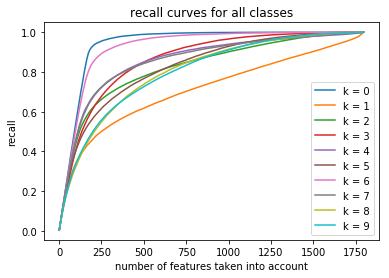

AOC of k = 0: 1692.74
AOC of k = 1: 1277.56
AOC of k = 2: 1483.62
AOC of k = 3: 1550.75
AOC of k = 4: 1543.07
AOC of k = 5: 1485.14
AOC of k = 6: 1663.76
AOC of k = 7: 1539.88
AOC of k = 8: 1443.43
AOC of k = 9: 1441.04


In [27]:
#recall plots
plt.title("recall curves for all classes")
plt.xlabel('number of features taken into account')
plt.ylabel('recall')

for k in range(0,10) :
    plt.plot(np.arange(1,1798),mean_precision_recall(k)[1], label = 'k = %i'%k)
    plt.legend()

plt.show()
for k in range(0,10):
    print('AOC of k = %i: %.2f'%(k,np.trapz(mean_precision_recall(k)[1], x = np.arange(1,1798))))

In [33]:
precisionGain = (np.ones(len(data))*len(data)/N_matrix - 1/precision) / ((np.ones(len(data))*len(data)/N_matrix)-1)
precisionGain[precisionGain < 0] = 0
recallGain = (np.ones(len(data))*len(data)/N_matrix - 1/recall) / ((np.ones(len(data))*len(data)/N_matrix)-1)
recallGain[recallGain < 0] = 0

In [35]:
def mean_precision_recall_Gain(k):
    precision_k = precisionGain[np.where(target == k)]
    recall_k = recallGain[np.where(target == k)]
    return np.mean(precision_k,axis = 0), np.mean(recall_k,axis = 0)

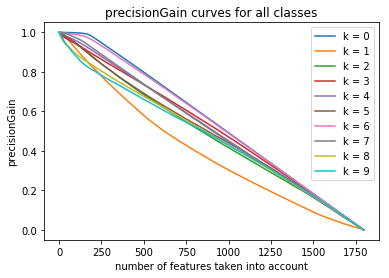

AOC of k = 0: 982.76
AOC of k = 1: 716.86
AOC of k = 2: 864.82
AOC of k = 3: 923.19
AOC of k = 4: 912.14
AOC of k = 5: 883.46
AOC of k = 6: 973.72
AOC of k = 7: 913.12
AOC of k = 8: 856.40
AOC of k = 9: 846.28


In [37]:
#precisionGain plots
plt.title("precisionGain curves for all classes")
plt.xlabel('number of features taken into account')
plt.ylabel('precisionGain')

for k in range(0,10) :
    plt.plot(np.arange(1,1798),mean_precision_recall_Gain(k)[0], label = 'k = %i'%k)
    plt.legend()
plt.show()
for k in range(0,10):
    print('AOC of k = %i: %.2f'%(k,np.trapz(mean_precision_recall_Gain(k)[0], x = np.arange(1,1798))))

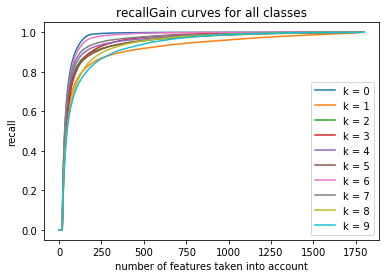

AOC of k = 0: 1749.24
AOC of k = 1: 1648.41
AOC of k = 2: 1699.87
AOC of k = 3: 1709.89
AOC of k = 4: 1710.47
AOC of k = 5: 1700.14
AOC of k = 6: 1741.55
AOC of k = 7: 1721.22
AOC of k = 8: 1685.01
AOC of k = 9: 1670.04


In [38]:
#recall plots
plt.title("recallGain curves for all classes")
plt.xlabel('number of features taken into account')
plt.ylabel('recall')

for k in range(0,10) :
    plt.plot(np.arange(1,1798),mean_precision_recall_Gain(k)[1], label = 'k = %i'%k)
    plt.legend()

plt.show()
for k in range(0,10):
    print('AOC of k = %i: %.2f'%(k,np.trapz(mean_precision_recall_Gain(k)[1], x = np.arange(1,1798))))

As we can see in the AOC values and the plots, the Gain-functions achieve a way better result (bigger AOC). Especially the recallGain plots start extremely steep and reach 1 within a small intervall which is desirable. 

## 2.2 Hand-Crafted Distance

In [130]:
def reduce_dim(x):
    red = np.zeros((x.shape[0], 2), dtype = np.float64)
    #iterate over the instances
    for i in range(x.shape[0]):
        y = x[i].reshape(8,8)
        red[i,0]=np.mean(y[:4,:4])-np.mean(y[4:,:4])
        red[i,1]=np.mean(y[:4,4:])-np.mean(y[4:,4:])
    return red

In [131]:
reduce_dim(data)

array([[ 0.875 ,  0.375 ],
       [ 1.0625, -0.375 ],
       [-2.9375,  1.0625],
       ...,
       [ 0.    , -1.25  ],
       [ 3.3125, -0.8125],
       [-0.0625, -2.9375]])

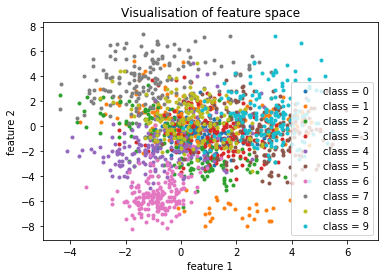

In [132]:
for k in range (10):
    plt.scatter(*reduce_dim(data[target == k]).T,label='class = %i'%k,marker = '.')
#plt.scatter(*reduce_dim(X_train[y_train==7]).T,label='seven')
plt.title('Visualisation of feature space')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

The points of the different classes should build distinct clusters to acieve the best AOC in the following. We couldn't achieve a better data seperation then the above.

In [133]:
newdata = reduce_dim(data)
TP2 = np.dot(np.equal((target + np.zeros(len(target)**2).reshape(len(target),len(target))).T,target[sorted_euclidean_dist(newdata,newdata)]),np.triu([1]*len(target)))
TP2.shape

(1797, 1797)

In [134]:
FP2 = np.dot(np.not_equal((target + np.zeros(len(target)**2).reshape(len(target),len(target))).T,target[sorted_euclidean_dist(newdata,newdata)]),np.triu([1]*len(target)))
FP2.shape

(1797, 1797)

In [135]:
precision2 = TP2/(TP2 + FP2)
recall2 = TP2/N_matrix
precisionGain2 = (np.ones(len(data))*len(data)/N_matrix - 1/precision2) / ((np.ones(len(data))*len(data)/N_matrix)-1)
precisionGain2[precisionGain2 < 0] = 0
recallGain2 = (np.ones(len(data))*len(data)/N_matrix - 1/recall2) / ((np.ones(len(data))*len(data)/N_matrix)-1)
recallGain2[recallGain2 < 0] = 0

def mean_precision_recall2(k):
    precision_k = precision2[np.where(target == k)]
    recall_k = recall2[np.where(target == k)]
    return np.mean(precision_k,axis = 0), np.mean(recall_k,axis = 0)

def mean_precision_recall_Gain2(k):
    precision_k = precisionGain2[np.where(target == k)]
    recall_k = recallGain2[np.where(target == k)]
    return np.mean(precision_k,axis = 0), np.mean(recall_k,axis = 0)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


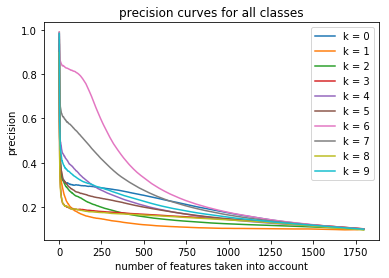

AOC of k = 0: 354.06
AOC of k = 1: 216.66
AOC of k = 2: 265.67
AOC of k = 3: 269.99
AOC of k = 4: 329.55
AOC of k = 5: 308.29
AOC of k = 6: 522.41
AOC of k = 7: 421.23
AOC of k = 8: 263.26
AOC of k = 9: 339.49


In [140]:
#precision plots
plt.title("precision curves for all classes")
plt.xlabel('number of features taken into account')
plt.ylabel('precision')

for k in range(0,10) :
    plt.plot(np.arange(1,1798),mean_precision_recall2(k)[0], label = 'k = %i'%k)
    plt.legend()
plt.show()
for k in range(0,10):
    print('AOC of k = %i: %.2f'%(k,np.trapz(mean_precision_recall2(k)[0], x = np.arange(1,1798))))

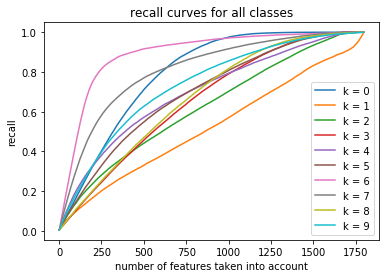

AOC of k = 0: 1425.27
AOC of k = 1: 936.11
AOC of k = 2: 1121.19
AOC of k = 3: 1181.91
AOC of k = 4: 1252.97
AOC of k = 5: 1246.62
AOC of k = 6: 1605.24
AOC of k = 7: 1458.22
AOC of k = 8: 1205.45
AOC of k = 9: 1318.01


In [141]:
#recall plots
plt.title("recall curves for all classes")
plt.xlabel('number of features taken into account')
plt.ylabel('recall')

for k in range(0,10) :
    plt.plot(np.arange(1,1798),mean_precision_recall2(k)[1], label = 'k = %i'%k)
    plt.legend()

plt.show()
for k in range(0,10):
    print('AOC of k = %i: %.2f'%(k,np.trapz(mean_precision_recall2(k)[1], x = np.arange(1,1798))))

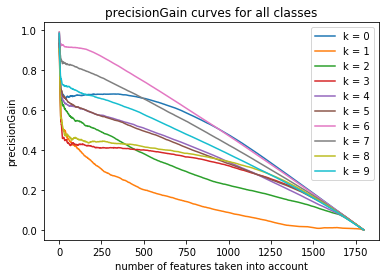

AOC of k = 0: 821.30
AOC of k = 1: 259.89
AOC of k = 2: 500.55
AOC of k = 3: 544.75
AOC of k = 4: 646.63
AOC of k = 5: 645.33
AOC of k = 6: 921.79
AOC of k = 7: 826.12
AOC of k = 8: 574.01
AOC of k = 9: 728.42


In [142]:
#precisionGain plots
plt.title("precisionGain curves for all classes")
plt.xlabel('number of features taken into account')
plt.ylabel('precisionGain')

for k in range(0,10) :
    plt.plot(np.arange(1,1798),mean_precision_recall_Gain2(k)[0], label = 'k = %i'%k)
    plt.legend()
plt.show()
for k in range(0,10):
    print('AOC of k = %i: %.2f'%(k,np.trapz(mean_precision_recall_Gain2(k)[0], x = np.arange(1,1798))))

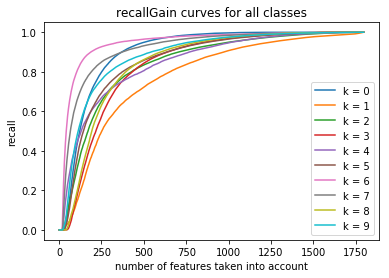

AOC of k = 0: 1620.86
AOC of k = 1: 1392.20
AOC of k = 2: 1510.91
AOC of k = 3: 1496.84
AOC of k = 4: 1521.45
AOC of k = 5: 1542.09
AOC of k = 6: 1699.85
AOC of k = 7: 1648.45
AOC of k = 8: 1519.24
AOC of k = 9: 1584.65


In [143]:
#recallGain plots
plt.title("recallGain curves for all classes")
plt.xlabel('number of features taken into account')
plt.ylabel('recall')

for k in range(0,10) :
    plt.plot(np.arange(1,1798),mean_precision_recall_Gain2(k)[1], label = 'k = %i'%k)
    plt.legend()

plt.show()
for k in range(0,10):
    print('AOC of k = %i: %.2f'%(k,np.trapz(mean_precision_recall_Gain2(k)[1], x = np.arange(1,1798))))